#Dataclean

Los inputs para el primer data_clean son:
- https://www.abdatachallenge.cat/

De la primera datashet, del consumo por L/día de agua, en base a los distritos.

Import necessary modules for cleaning and visualitation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import water cosumption database from the first link provided from Aigües de Barcelona

In [7]:
data = pd.read_parquet("./data/01_table.parquet")

Get some information regarding the database

In [8]:
data.shape

(963419, 7)

In [9]:
data.head()

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [10]:
data.tail()

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
963414,None,None,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,2082,48293
963415,None,None,BARCELONA,2023-12-30,Industrial/Industrial/Industrial,87,255366
963416,None,None,BARCELONA,2023-12-31,Comercial/Comercial/Commercial,237,20749
963417,None,None,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,2082,53443
963418,None,None,BARCELONA,2023-12-31,Industrial/Industrial/Industrial,87,230242


In [11]:
data.describe(include='all')

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
count,962324,962324,963419,963419,963419,963419.000000,9.634190e+05
unique,1075,13,1,365,3,NaN,NaN
top,801901001,2,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,NaN,NaN
freq,1095,162450,963419,2680,392307,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,252.194256,2.374084e+04
std,NaN,NaN,NaN,NaN,NaN,283.118277,2.261520e+05
min,NaN,NaN,NaN,NaN,NaN,2.000000,-1.642869e+06
25%,NaN,NaN,NaN,NaN,NaN,25.000000,3.832000e+03
50%,NaN,NaN,NaN,NaN,NaN,70.000000,8.079000e+03
75%,NaN,NaN,NaN,NaN,NaN,493.000000,1.503100e+04


Rename the columns so we don´t have any errors with formatting

In [12]:
data.columns = ['Seccio_censal', 'Districte', 'Municipi', 'Data', 'Tipus_us', 'Numero_de_comptadors', 'Consum_litres_per_dia' ]

Una vez corregido los columns_names debido a posibles fallos con los espacios o caracteres especiales. Realizamos una primera comprobación de limpieza

Comprobamos valores nulos

In [13]:
data.isnull().sum()

Seccio_censal            1095
Districte                1095
Municipi                    0
Data                        0
Tipus_us                    0
Numero_de_comptadors        0
Consum_litres_per_dia       0
dtype: int64

Con esto sabemos que las principales tablas que vamos a tener que limpiar son Seccio_cesal y Distrito.

Clean null values

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

Seccio_censal            0
Districte                0
Municipi                 0
Data                     0
Tipus_us                 0
Numero_de_comptadors     0
Consum_litres_per_dia    0
dtype: int64

A primera vista parece corregido, pero investigando un poco más los valores con data.tail(), observamos que tiene valores nulos, pero que no los ha identificado debido a su tipo.

In [16]:
data.tail()

,Seccio_censal,Districte,Municipi,Data,Tipus_us,Numero_de_comptadors,Consum_litres_per_dia
962319,<NULL>,>,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,2917,71934
962320,<NULL>,>,BARCELONA,2023-12-30,Industrial/Industrial/Industrial,301,417221
962321,<NULL>,>,BARCELONA,2023-12-31,Comercial/Comercial/Commercial,345,30746
962322,<NULL>,>,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,2917,80369
962323,<NULL>,>,BARCELONA,2023-12-31,Industrial/Industrial/Industrial,301,410164


Estos valores incorrectos se deben debido a que contienen caracteres especiales, que en la primera busqueda no ha identificado.

Convert columns to correct type

En data_cesal y en Districte los datos eran:
- NULL
- '< NULL >'
- <

In [17]:
data['Seccio_censal'] = data['Seccio_censal'].replace(['<NULL>', '<N/A>', '<', 'NA'], np.nan).astype('Int64')

In [18]:
data.isnull().sum()

Seccio_censal            1095
Districte                   0
Municipi                    0
Data                        0
Tipus_us                    0
Numero_de_comptadors        0
Consum_litres_per_dia       0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

Seccio_censal            0
Districte                0
Municipi                 0
Data                     0
Tipus_us                 0
Numero_de_comptadors     0
Consum_litres_per_dia    0
dtype: int64

Comparamos los datos y hay que comparar cuantos se ha perdido, debido a que en nuestra data, el valor más importante es el codigo de Seccio_censal, no podremos sustituir los datos, asi que tendremos que eliminarlos

In [21]:
shape_org = 963419

new_shape = data.shape
print(f"shape original: {shape_org}, shape final: {new_shape}")

shape original: 963419, shape final: (961229, 7)


Hagamos otro estudio de los datos, examinemos con profundidad si nos queda algún valor imprevisto en Districte

In [22]:
data.tail()

,Seccio_censal,Districte,Municipi,Data,Tipus_us,Numero_de_comptadors,Consum_litres_per_dia
961224,820506001,06,BARCELONA,2023-12-27,Domèstic/Doméstico/Domestic,10,1252
961225,820506001,06,BARCELONA,2023-12-28,Domèstic/Doméstico/Domestic,10,1003
961226,820506001,06,BARCELONA,2023-12-29,Domèstic/Doméstico/Domestic,10,1336
961227,820506001,06,BARCELONA,2023-12-30,Domèstic/Doméstico/Domestic,10,742
961228,820506001,06,BARCELONA,2023-12-31,Domèstic/Doméstico/Domestic,10,1040


In [23]:
assert not data['Districte'].isin(['<NULL>', '<N/A>', '<', 'NA']).any(), \
    "Error: La columna 'Districte' todavía contiene valores no válidos ('<NULL>', '<N/A>', '<', 'NA')."

Comprobamos que todos los datos restantes sean correctos, lo comprobamos con un assert y nos encargamos de castear todos los datos correctamente, para poder operar con ellos, en un futuro

In [24]:
data['Districte'] = data['Districte'].astype('Int64')

In [25]:
data['Numero_de_comptadors'] = data['Numero_de_comptadors'].astype('Int64')

data.loc[:, 'Data'] = pd.to_datetime(data['Data'], errors='coerce')
data.loc[:, 'Seccio_censal'] = pd.to_numeric(data['Seccio_censal'], errors='coerce')
data.loc[:, 'Districte'] = pd.to_numeric(data['Districte'], errors='coerce')
data.loc[:, 'Numero_de_comptadors'] = pd.to_numeric(data['Numero_de_comptadors'], errors='coerce')
data.loc[:, 'Consum_litres_per_dia'] = pd.to_numeric(data['Consum_litres_per_dia'], errors='coerce')
data.loc[:, 'Municipi'] = data['Municipi'].astype(str)
data.loc[:, 'Tipus_us'] = data['Tipus_us'].astype(str)

The "tipus_us" column has values in 3 languages, put them in catalan

In [26]:
data['Tipus_us'] = data['Tipus_us'].str.split('/').str[-1].str.strip().str.lower()

Realizamos un comprobación de los datos

In [27]:
data.head()
data.tail()

,Seccio_censal,Districte,Municipi,Data,Tipus_us,Numero_de_comptadors,Consum_litres_per_dia
961224,820506001,6,BARCELONA,2023-12-27 00:00:00,domestic,10,1252
961225,820506001,6,BARCELONA,2023-12-28 00:00:00,domestic,10,1003
961226,820506001,6,BARCELONA,2023-12-29 00:00:00,domestic,10,1336
961227,820506001,6,BARCELONA,2023-12-30 00:00:00,domestic,10,742
961228,820506001,6,BARCELONA,2023-12-31 00:00:00,domestic,10,1040


Remove rows with negative or unrealistic consumption:

In [28]:
data = data[data['Consum_litres_per_dia'] > 0]

Remove duplicates

In [29]:
data = data.drop_duplicates()

Fix inconsistent categories

In [30]:
data['Municipi'] = data['Municipi'].str.strip().str.upper()
data['Tipus_us'] = data['Tipus_us'].str.strip().str.capitalize()

Check values have the right format

In [31]:
data.tail()

,Seccio_censal,Districte,Municipi,Data,Tipus_us,Numero_de_comptadors,Consum_litres_per_dia
961224,820506001,6,BARCELONA,2023-12-27 00:00:00,Domestic,10,1252
961225,820506001,6,BARCELONA,2023-12-28 00:00:00,Domestic,10,1003
961226,820506001,6,BARCELONA,2023-12-29 00:00:00,Domestic,10,1336
961227,820506001,6,BARCELONA,2023-12-30 00:00:00,Domestic,10,742
961228,820506001,6,BARCELONA,2023-12-31 00:00:00,Domestic,10,1040


Hagamos una comprobación final

In [32]:
eq_shape = 958504/963419 * 100
print(f"shape original: 963419, shape final: 958504, eq: {eq_shape}% de los datos")

shape original: 963419, shape final: 958504, eq: 99.48983775491246% de los datos


Representando que la perdida sobre el shape original es apenas inferior a 0.5%

Values have now the right format and null values are removed

Create multiple tables per Tipus_us and and Districte

In [33]:
import os

In [34]:
output_folder = "output_tables"
os.makedirs(output_folder, exist_ok=True)

In [35]:
tables = {}

for (district, tipus), group in data.groupby(['Districte', 'Tipus_us']):
    group = group.reset_index(drop=True)
    key = f"D{district}_{tipus}"
    tables[key] = group


for key, table in tables.items():
    safe_key = str(key).replace('/', '_').replace('\\', '_').replace(' ', '_')
    table.to_csv(os.path.join(output_folder, f"{safe_key}.csv"), index=False)

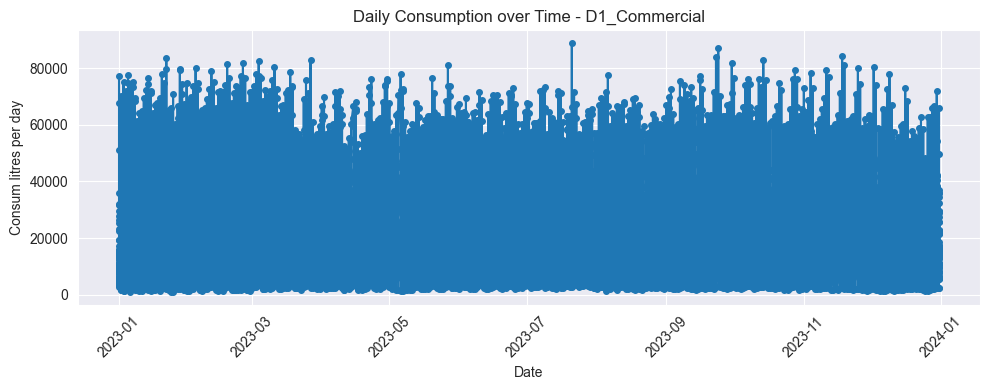

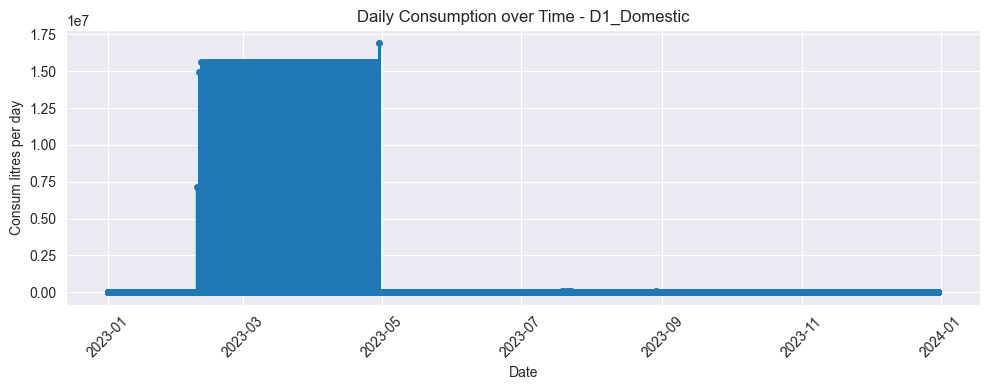

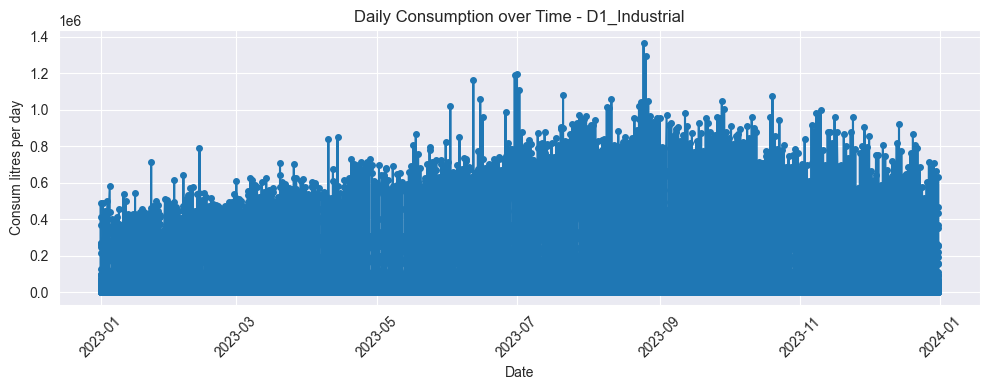

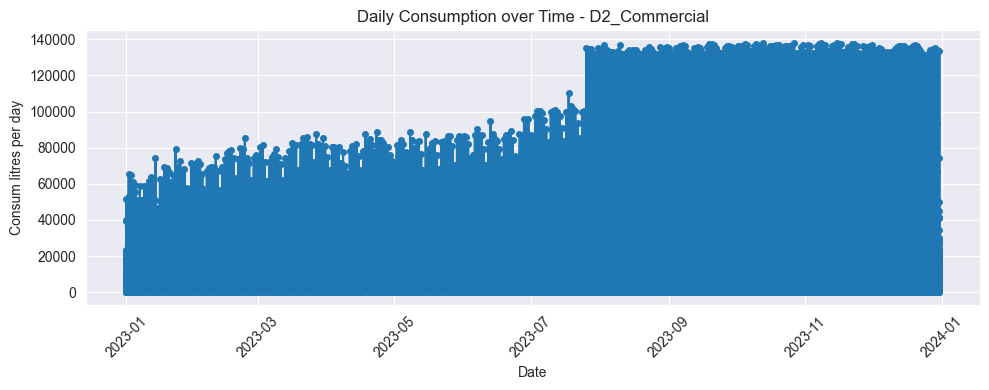

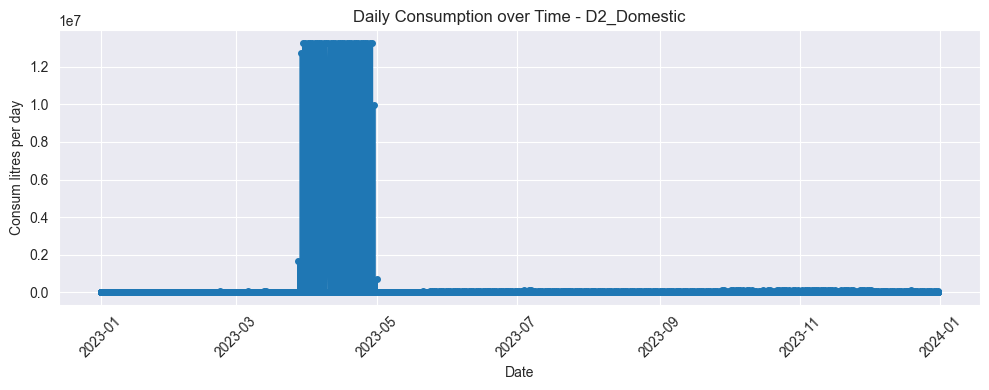

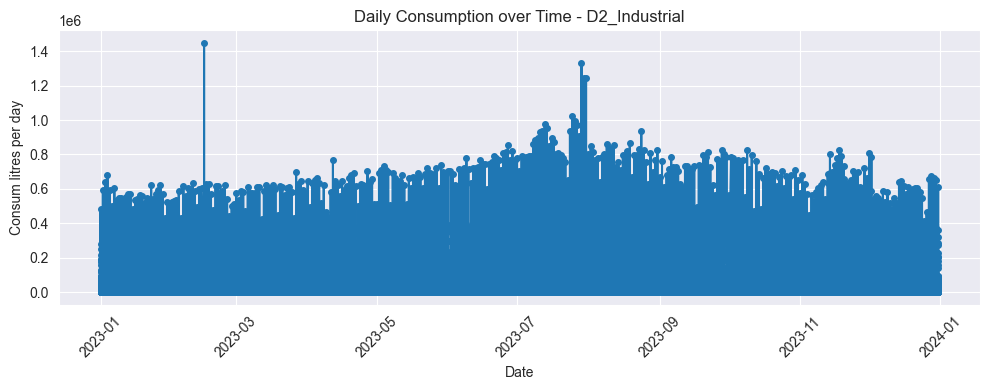

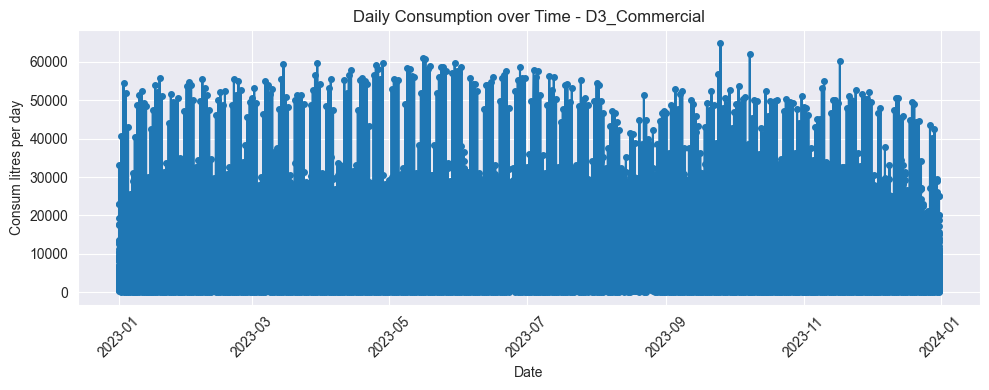

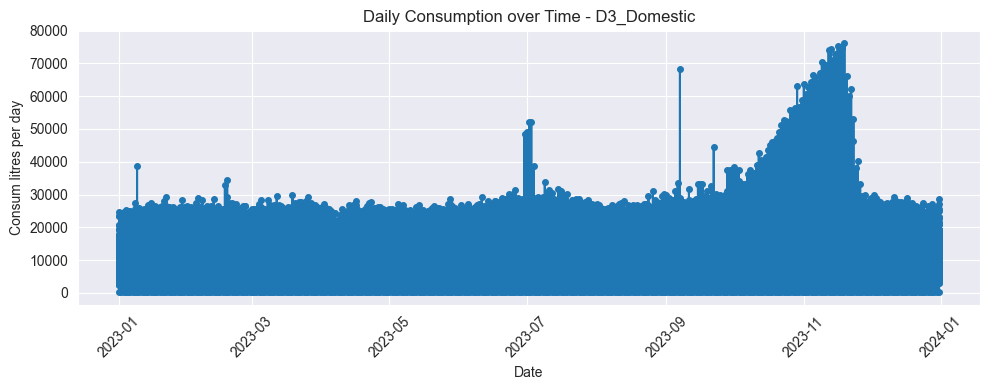

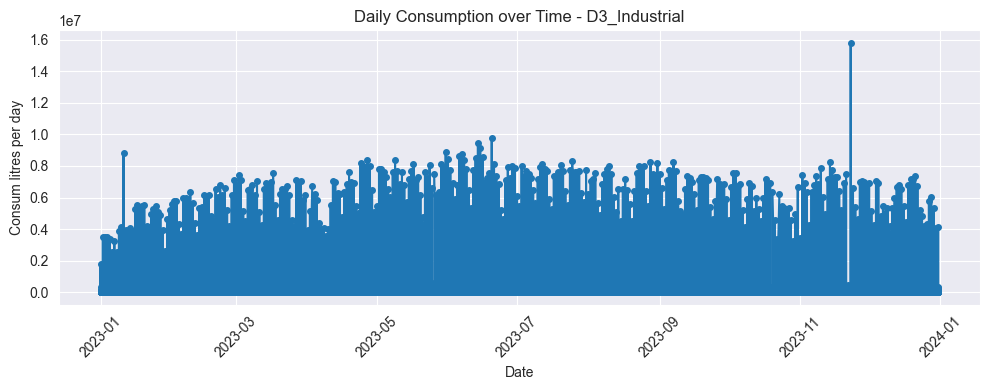

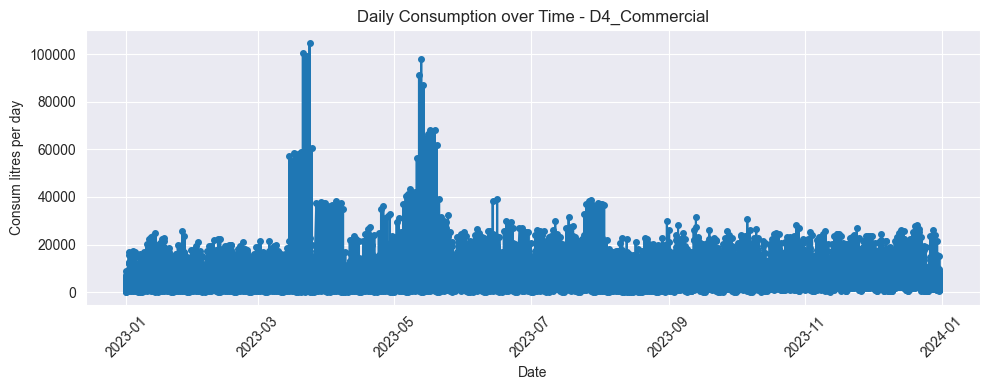

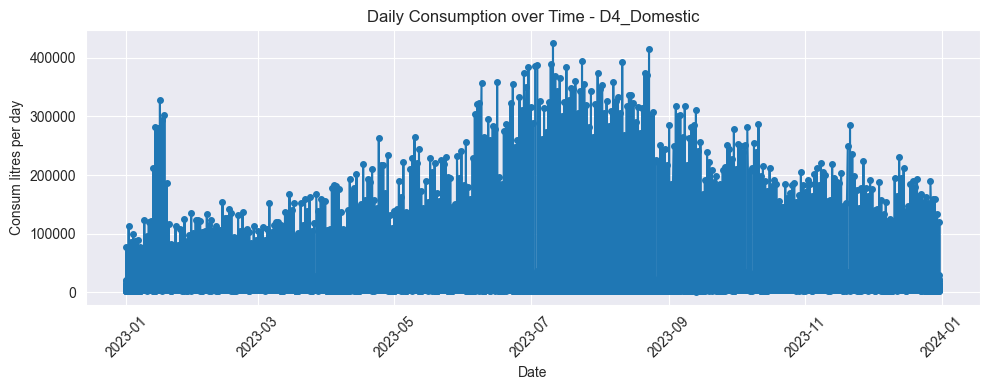

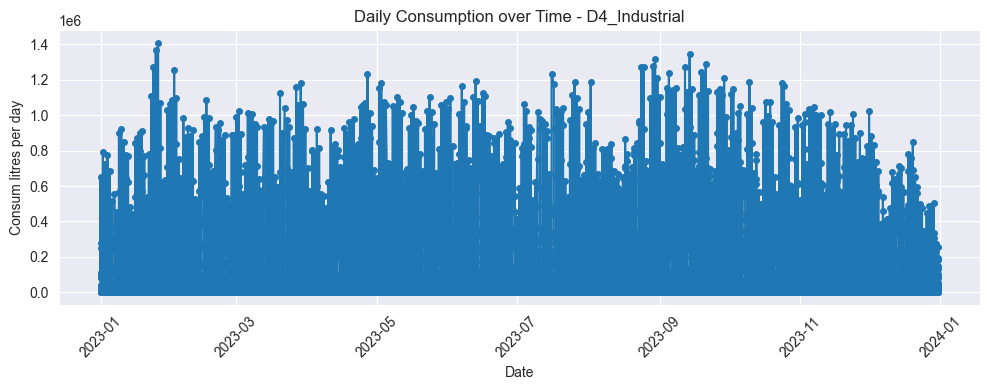

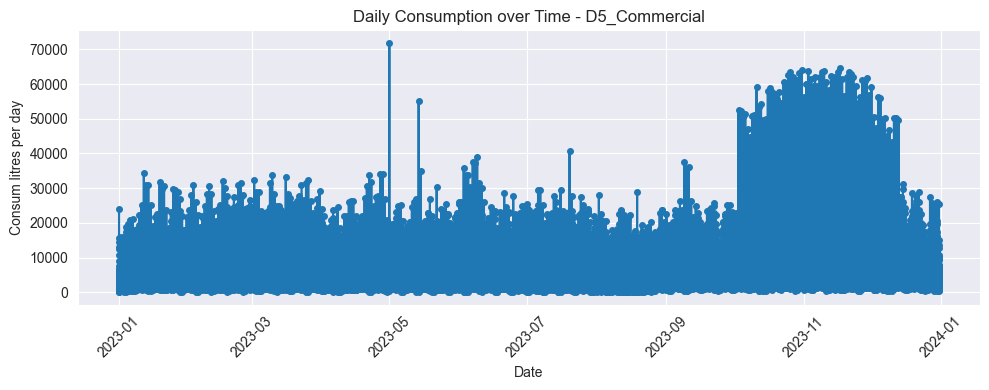

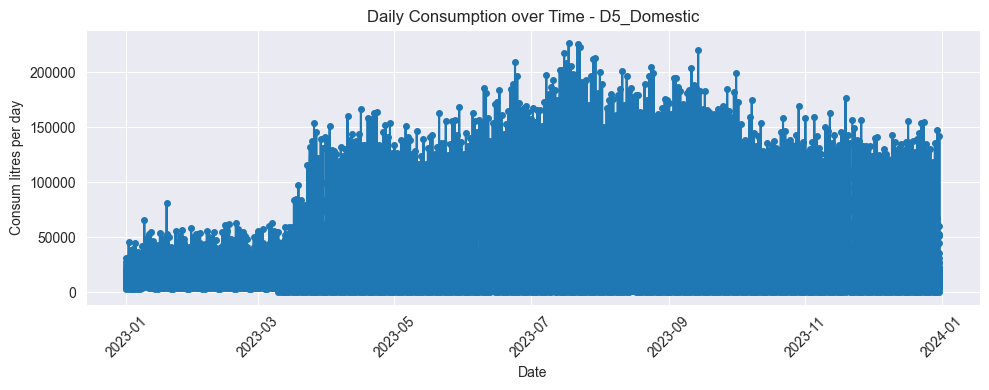

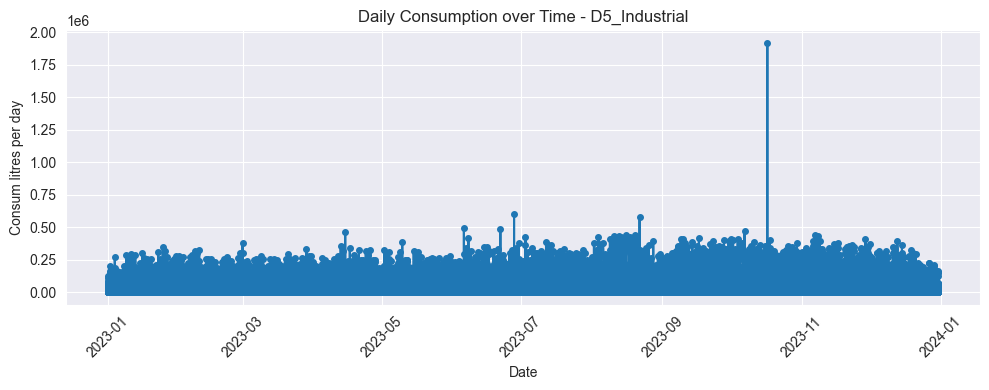

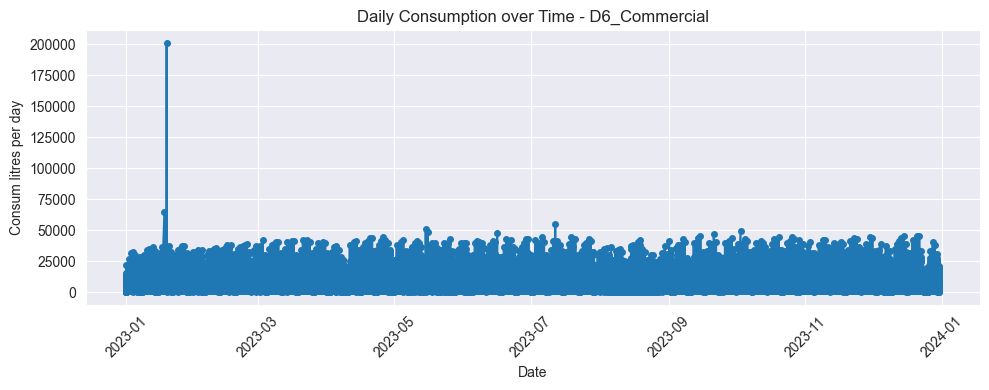

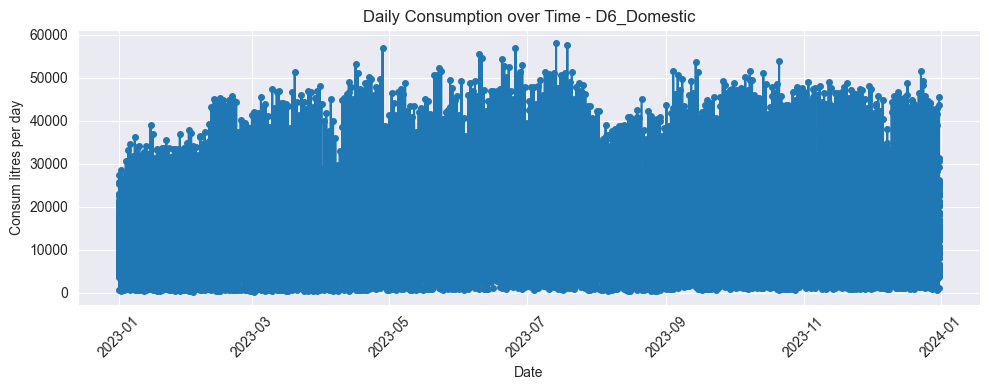

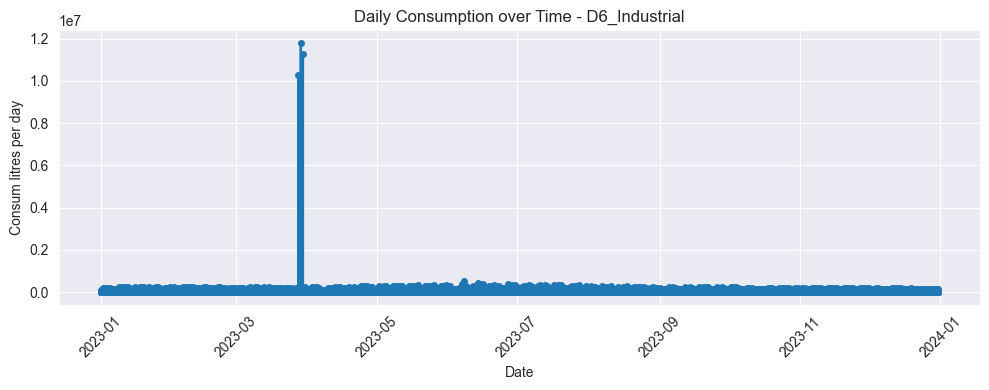

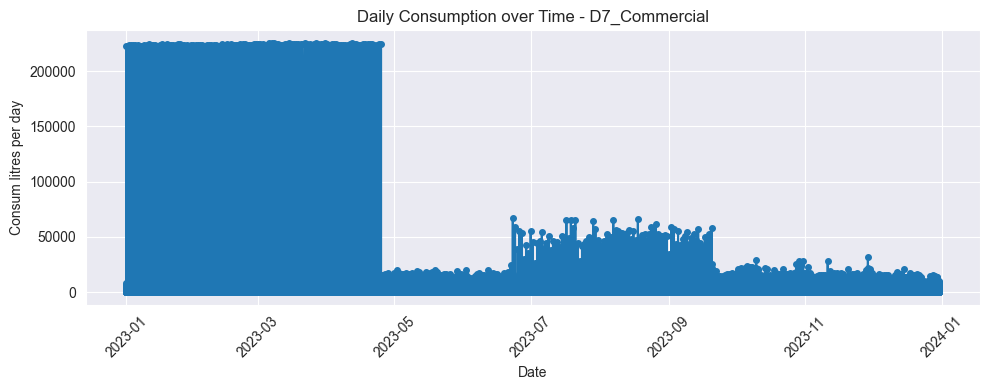

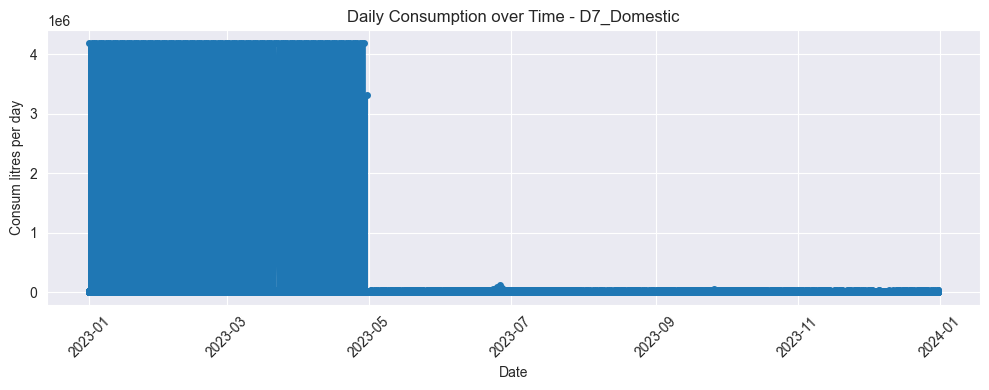

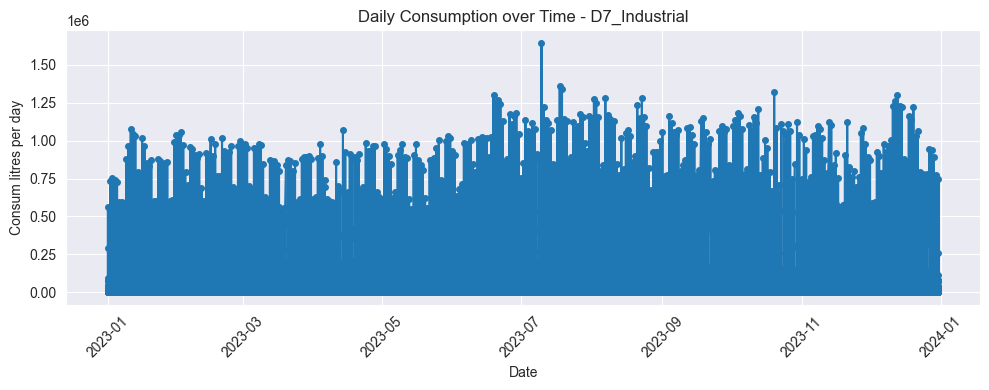

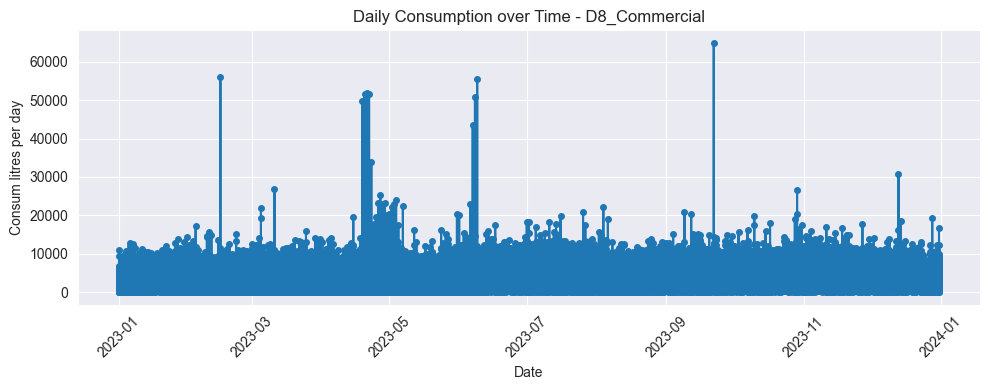

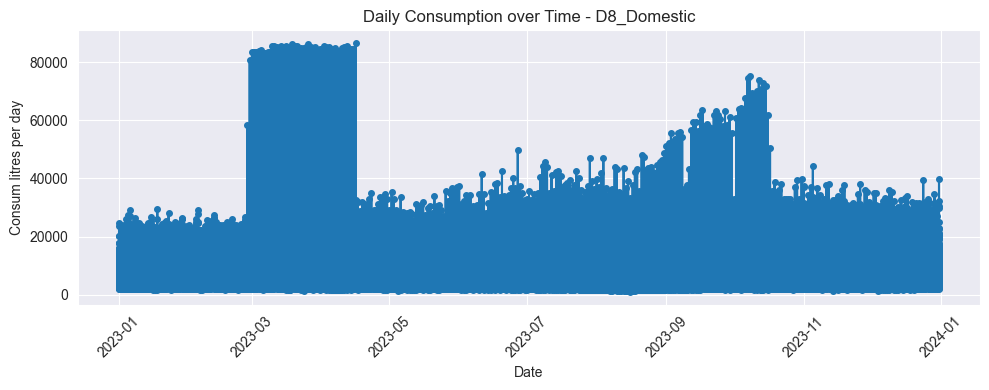

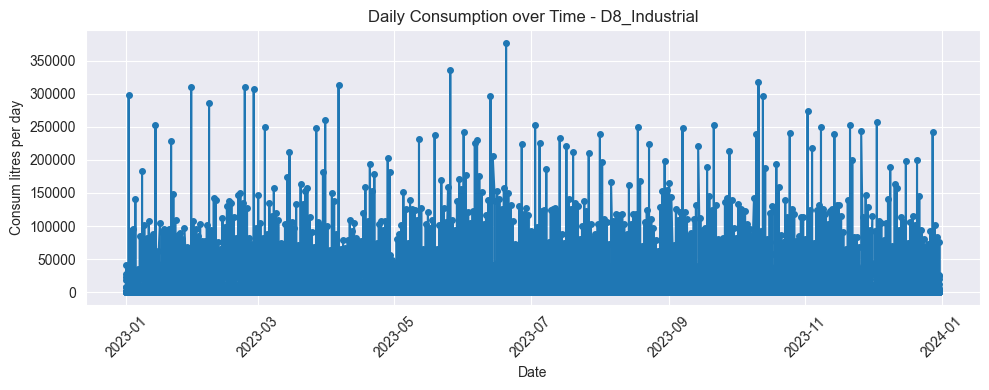

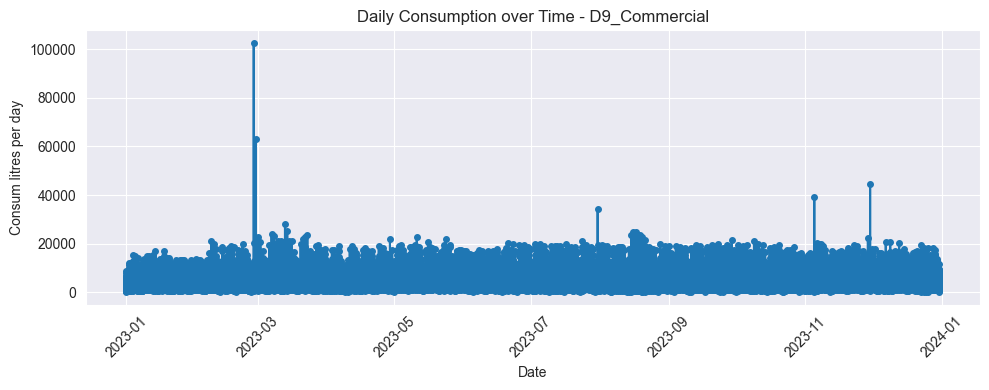

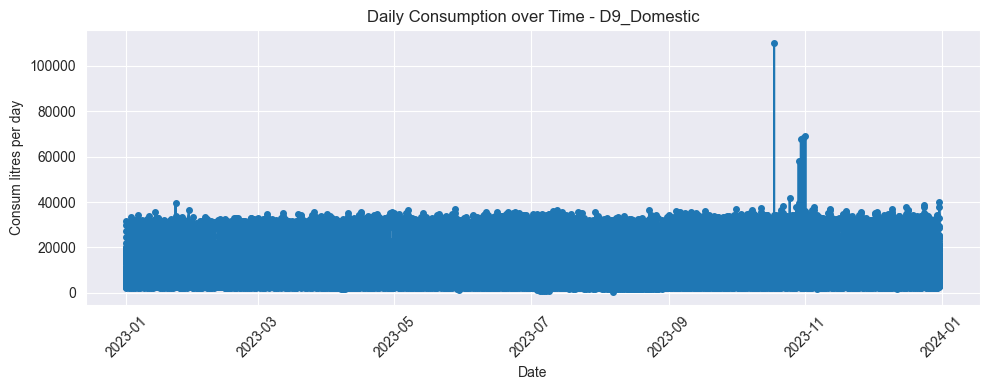

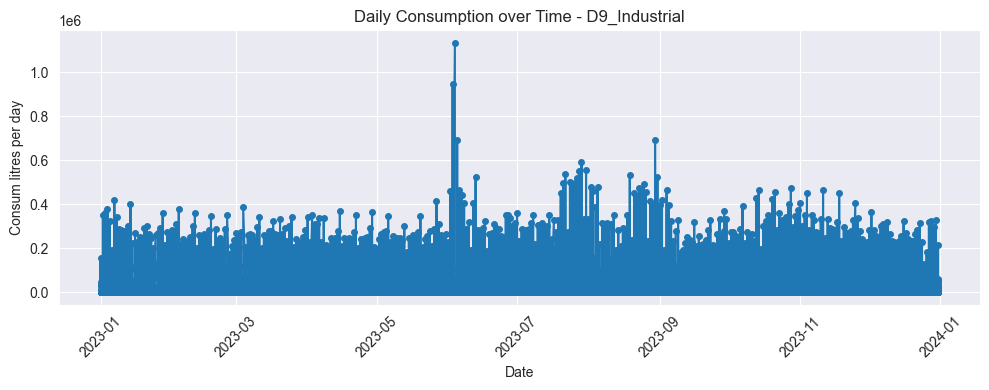

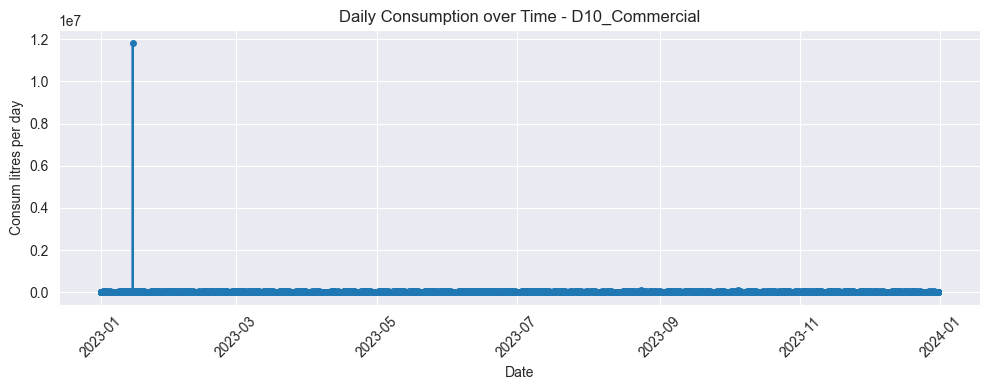

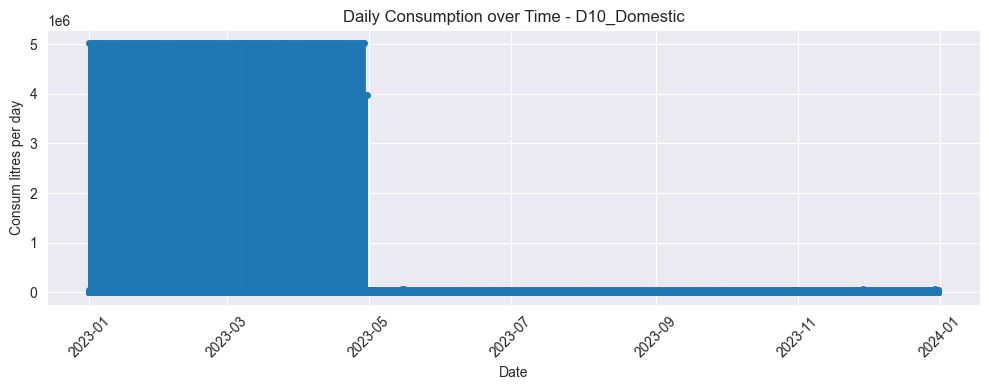

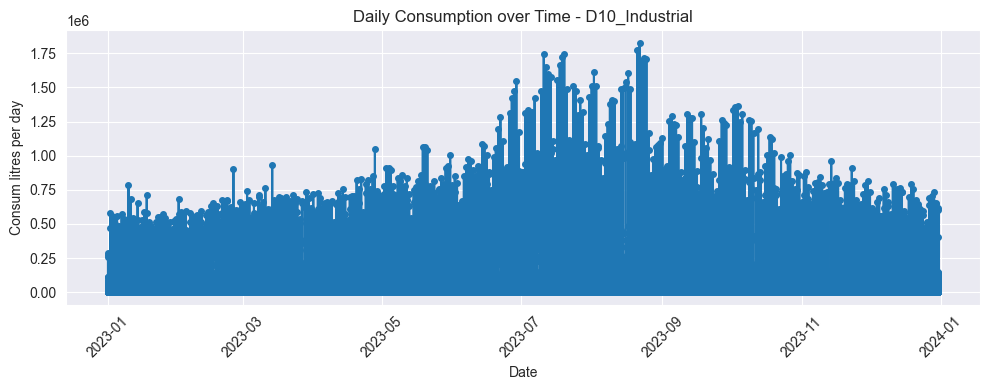

In [36]:
for key, table in tables.items():
    table['Data'] = pd.to_datetime(table['Data'], errors='coerce')
    table = table.sort_values('Data')  # sort by date

    plt.figure(figsize=(10,4))
    plt.plot(table['Data'], table['Consum_litres_per_dia'], marker='o', linestyle='-', markersize=4)
    plt.title(f"Daily Consumption over Time - {key}")
    plt.xlabel("Date")
    plt.ylabel("Consum litres per day")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()